In [2]:
from utils.model_evaluation import plot_test_pred
import pandas as pd
import scipy as sci

#loading the raw test data
X_test = pd.read_csv('./model_data/X_test.csv', index_col=0)
y_test = pd.read_csv('./model_data/y_test.csv', index_col=0)
X_test.drop(columns=['mfc10_residual'], inplace=True)
data = pd.concat((X_test,y_test), axis=1)

In [3]:
# filtering out the values at the two ends of the wing
def std_normalization(data):
    data = (data[(data.x1 > 2603) & (data.x1 <= 13976)])
    y = data[['x1', 'y1']] 
    x = data.drop(['x1', 'y1'], axis=1)
    # finding sum of the mass flow rates of the row
    sum_flows = x.sum(axis=1)
    # normalizing each column with its row sum
    norm_x = x.divide(sum_flows, axis=0)
    norm_x.columns = ['mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10', 'mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5']
    # norm_x.sum(axis=1)
    return y, norm_x

y, norm_x = std_normalization(data)

In [4]:
# def softmax_normalization(data):
#     data = (data[(data.x1 > 2603) & (data.x1 <= 13976)])
#     y = data[['x1', 'y1']] 
#     x = data.drop(['x1', 'y1'], axis=1)
#     # x = tf.convert_to_tensor(x)
#     # norm_x = tf.keras.activations.softmax(x, axis=1).numpy()
#     norm_x = sci.special.softmax(x, axis=1)
#     norm_x = pd.DataFrame(norm_x, 
#                           columns=['mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10', 'mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5'],
#                           index=data.index)
#     return y, norm_x

# y, norm_x = softmax_normalization(data)

In [5]:
full_data = (data[(data.x1 > 2603) & (data.x1 <= 13976)]).drop(['x1', 'y1'], axis=1)
full_data['sum'] =  full_data.sum(axis=1)
full_data.head()

,MFC6,MFC7,MFC8,MFC9,MFC10,MFC1,MFC2,MFC3,MFC4,MFC5,sum
757,0.0435,0.0350,0.0194,0.0000,0.0202,0.1531,0.0510,0.0182,0.0099,0.0000,0.3503
655,0.0150,0.0287,0.0413,0.0382,0.0330,0.0145,0.0298,0.0928,0.0596,0.0233,0.3762
167,0.0090,0.0174,0.0303,0.0957,0.0851,0.0000,0.0134,0.0228,0.0522,0.0548,0.3807
293,0.0000,0.0127,0.0176,0.0344,0.0590,0.0000,0.0106,0.0196,0.1017,0.0851,0.3407
239,0.0228,0.0380,0.0331,0.0206,0.0304,0.0301,0.0876,0.0816,0.0244,0.0119,0.3805


In [6]:
norm_x.head()
norm_x['sum'] =  norm_x.sum(axis=1)
norm_x.head()

,mfc6,mfc7,mfc8,mfc9,mfc10,mfc1,mfc2,mfc3,mfc4,mfc5,sum
757,0.124179,0.099914,0.055381,0.000000,0.057665,0.437054,0.145589,0.051955,0.028261,0.000000,1.0
655,0.039872,0.076289,0.109782,0.101542,0.087719,0.038543,0.079213,0.246677,0.158426,0.061935,1.0
167,0.023641,0.045705,0.079590,0.251379,0.223536,0.000000,0.035198,0.059890,0.137116,0.143945,1.0
293,0.000000,0.037276,0.051658,0.100969,0.173173,0.000000,0.031112,0.057529,0.298503,0.249780,1.0
239,0.059921,0.099869,0.086991,0.054139,0.079895,0.079106,0.230223,0.214455,0.064126,0.031275,1.0


In [7]:
def leakage_prediction(normalized_flows):
    # coordinates of the sensor
    sensors = pd.DataFrame([[2426, 70], [5480, 70], [8661, 191], [11676, 584], [13976, 917], [2603, 5163], 
                            [5723, 5163], [8417, 5103], [11646, 4740], [14641, 4391]], 
                            columns=['x', 'y'], 
                            index=['mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5', 'mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10']
                            )
    # x coordinate of the sensor
    sensors_x = sensors['x']
    # y coordinate of the sensor
    sensors_y = sensors['y']
    leakage_x = 0
    leakage_y = 0
    for i in range(1,11):
        sensor = 'mfc'+str(i)
        # multiplying each sensor coordinate with its normalized value and adding this value of each sensor together using for loop
        leakage_x = leakage_x + sensors_x[sensor] * normalized_flows[sensor] 
        leakage_y = leakage_y + sensors_y[sensor] * normalized_flows[sensor]
    leakage = pd.concat((leakage_x, leakage_y),axis=1)
    return leakage
leakage = leakage_prediction(norm_x)

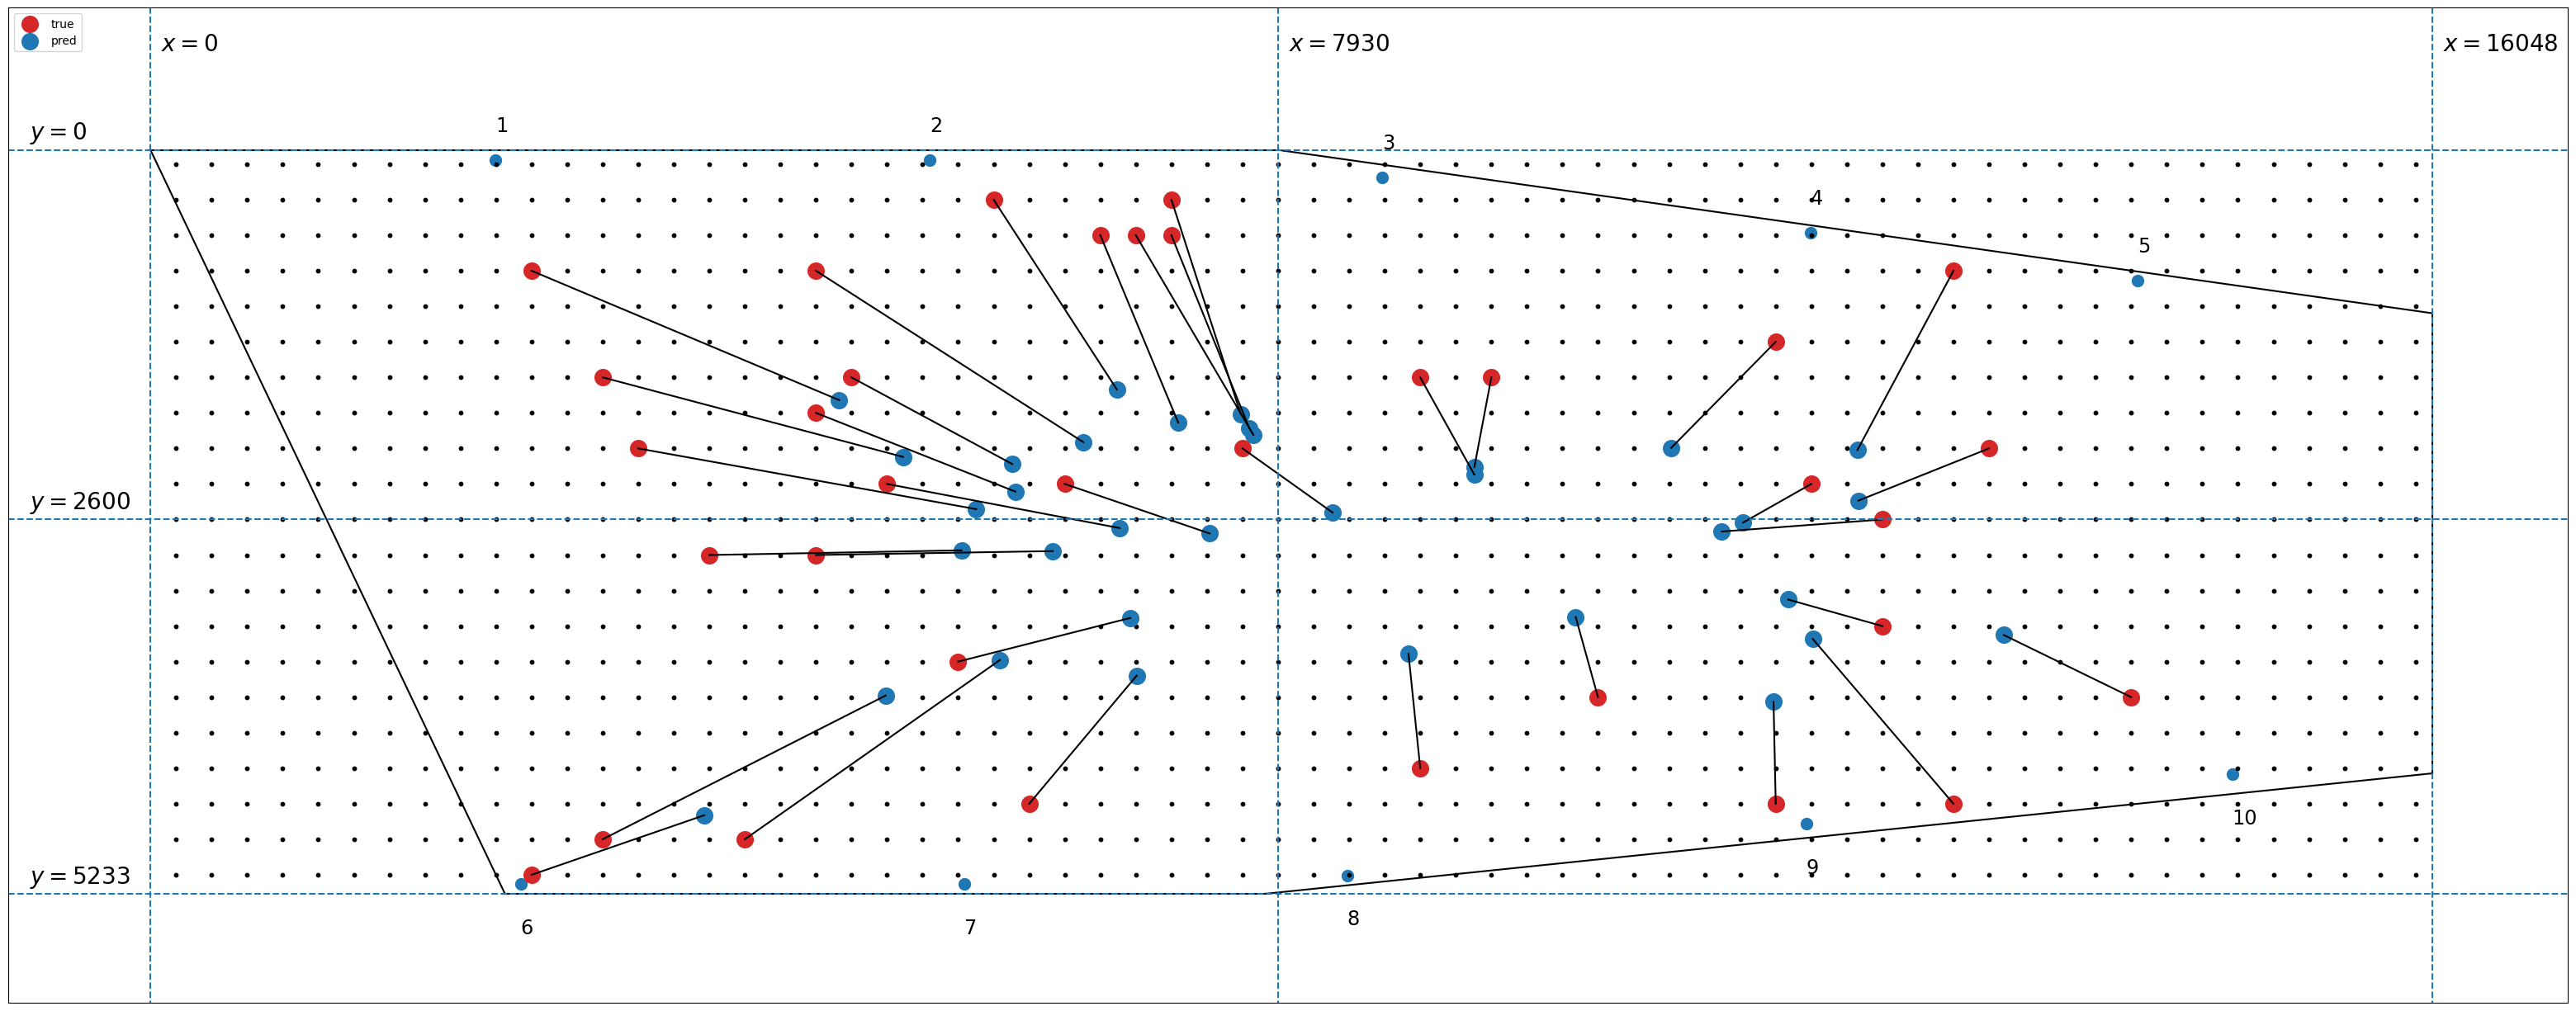

In [8]:
# plot of predicted and true value
plot_test_pred(y.to_numpy(), leakage.to_numpy())